# Haensel AMS - Predicting Price

## Contents
* [Assignment](#Assignment)
* [Question 1](#Question-1)
* [Question 2](#Question-2)
* [Question 3](#Question-3)
* [Question 4](#Question-4)

### Assignment 
The target variable is 'price'. You have 7 attributes and obviously we want you to build some initial ML model which predicts the prices.

1. Make some initial data analysis, which will hint to some stuctures in the data and how attributes are connected.
2. Fit some ML model(s) and explain briefly your choices.
3. Show with some X-validation the power of your model and comment the results.
4. Present us the results and the steps you have taken and also with some critical thinking and next steps.


## Question 1

1. Make some initial data analysis, which will hint to some stuctures in the data and how attributes are connected.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('sample.csv')
data.head(3)

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0,3.8,73.49
1,9,99,1,Thu,340,2760.0,9.2,300.00
2,0,04,0,Mon,16,2700.0,3.0,130.00


In [3]:
data.isnull().sum()

loc1     0
loc2     0
para1    0
dow      0
para2    0
para3    0
para4    0
price    0
dtype: int64

We don't have any missing value(NaN). 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loc1    10000 non-null  object 
 1   loc2    10000 non-null  object 
 2   para1   10000 non-null  int64  
 3   dow     10000 non-null  object 
 4   para2   10000 non-null  int64  
 5   para3   10000 non-null  float64
 6   para4   10000 non-null  float64
 7   price   10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [5]:
data['loc1'].value_counts()

2    1607
0    1486
1    1223
7    1081
3     945
5     846
4     773
8     727
9     690
6     620
S       1
T       1
Name: loc1, dtype: int64

In [6]:
data = data[(data['loc1'].str.contains('S') == False) & (data['loc1'].str.contains('T') == False)]

In [7]:
data['loc1'].value_counts()

2    1607
0    1486
1    1223
7    1081
3     945
5     846
4     773
8     727
9     690
6     620
Name: loc1, dtype: int64

In [8]:
# If ‘coerce’, then invalid parsing will be set as NaN.

data['loc1'] = pd.to_numeric(data['loc1'], errors='coerce')
data['loc2'] = pd.to_numeric(data['loc2'], errors='coerce')
data.dropna(inplace = True)

We add errors argument equal to coerce to change string types to Na. Then we will use the dropna method to remove Na's.

In [9]:
dow_dummies = pd.get_dummies(data['dow'])
dow_dummies.head()

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0


In [10]:
data_2 = data.copy(deep=True)

In [11]:
data_2.drop('dow', axis = 1,inplace = True)
result = data_2.join(dow_dummies)
result.head()

,loc1,loc2,para1,para2,para3,para4,price,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1.0,1,662,3000.0,3.8,73.49,0,1,0,0,0,0,0
1,9,99.0,1,340,2760.0,9.2,300.00,0,0,0,0,1,0,0
2,0,4.0,0,16,2700.0,3.0,130.00,0,1,0,0,0,0,0
3,4,40.0,1,17,12320.0,6.4,365.00,0,1,0,0,0,0,0
4,5,50.0,1,610,2117.0,10.8,357.50,0,0,0,0,1,0,0


In [12]:
days_of_week = {'Mon': 1, 'Tue' : 2, 'Wed' : 3, 'Thu' : 4, 'Fri' : 5, 'Sat' : 6, 'Sun' : 7} 

In [13]:
data['dow'] = data['dow'].map(days_of_week)
data.head()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,1.0,1,1,662,3000.0,3.8,73.49
1,9,99.0,1,4,340,2760.0,9.2,300.00
2,0,4.0,0,1,16,2700.0,3.0,130.00
3,4,40.0,1,1,17,12320.0,6.4,365.00
4,5,50.0,1,4,610,2117.0,10.8,357.50


array([[<AxesSubplot:xlabel='loc1', ylabel='loc1'>,
        <AxesSubplot:xlabel='loc2', ylabel='loc1'>,
        <AxesSubplot:xlabel='para1', ylabel='loc1'>,
        <AxesSubplot:xlabel='para2', ylabel='loc1'>,
        <AxesSubplot:xlabel='para3', ylabel='loc1'>,
        <AxesSubplot:xlabel='para4', ylabel='loc1'>,
        <AxesSubplot:xlabel='price', ylabel='loc1'>],
       [<AxesSubplot:xlabel='loc1', ylabel='loc2'>,
        <AxesSubplot:xlabel='loc2', ylabel='loc2'>,
        <AxesSubplot:xlabel='para1', ylabel='loc2'>,
        <AxesSubplot:xlabel='para2', ylabel='loc2'>,
        <AxesSubplot:xlabel='para3', ylabel='loc2'>,
        <AxesSubplot:xlabel='para4', ylabel='loc2'>,
        <AxesSubplot:xlabel='price', ylabel='loc2'>],
       [<AxesSubplot:xlabel='loc1', ylabel='para1'>,
        <AxesSubplot:xlabel='loc2', ylabel='para1'>,
        <AxesSubplot:xlabel='para1', ylabel='para1'>,
        <AxesSubplot:xlabel='para2', ylabel='para1'>,
        <AxesSubplot:xlabel='para3', ylabel='p

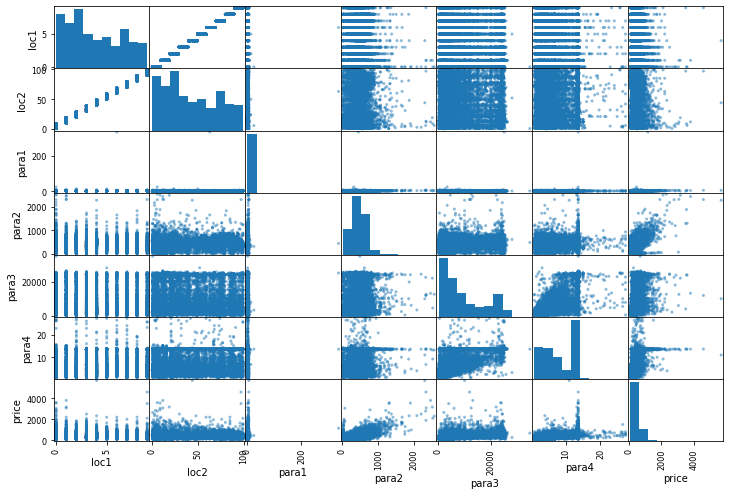

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(result.iloc[:,0:7], figsize=(12, 8))

It looks like we have a high correlation between loc1 and loc2.

In [15]:
pd.DataFrame(abs(result.corr()["price"])).sort_values(by = "price", ascending = False)

,price
price,1.000000
para2,0.551222
para4,0.517614
para3,0.356949
para1,0.074555
loc1,0.044079
loc2,0.043543
Wed,0.026684
Fri,0.025674
Mon,0.021734


We drop the lowest correlation.

In [16]:
result.drop(columns = "loc2", inplace = True)

Distribution of our variables.

array([[<AxesSubplot:title={'center':'loc1'}>,
        <AxesSubplot:title={'center':'para1'}>,
        <AxesSubplot:title={'center':'para2'}>,
        <AxesSubplot:title={'center':'para3'}>],
       [<AxesSubplot:title={'center':'para4'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'Fri'}>,
        <AxesSubplot:title={'center':'Mon'}>],
       [<AxesSubplot:title={'center':'Sat'}>,
        <AxesSubplot:title={'center':'Sun'}>,
        <AxesSubplot:title={'center':'Thu'}>,
        <AxesSubplot:title={'center':'Tue'}>],
       [<AxesSubplot:title={'center':'Wed'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

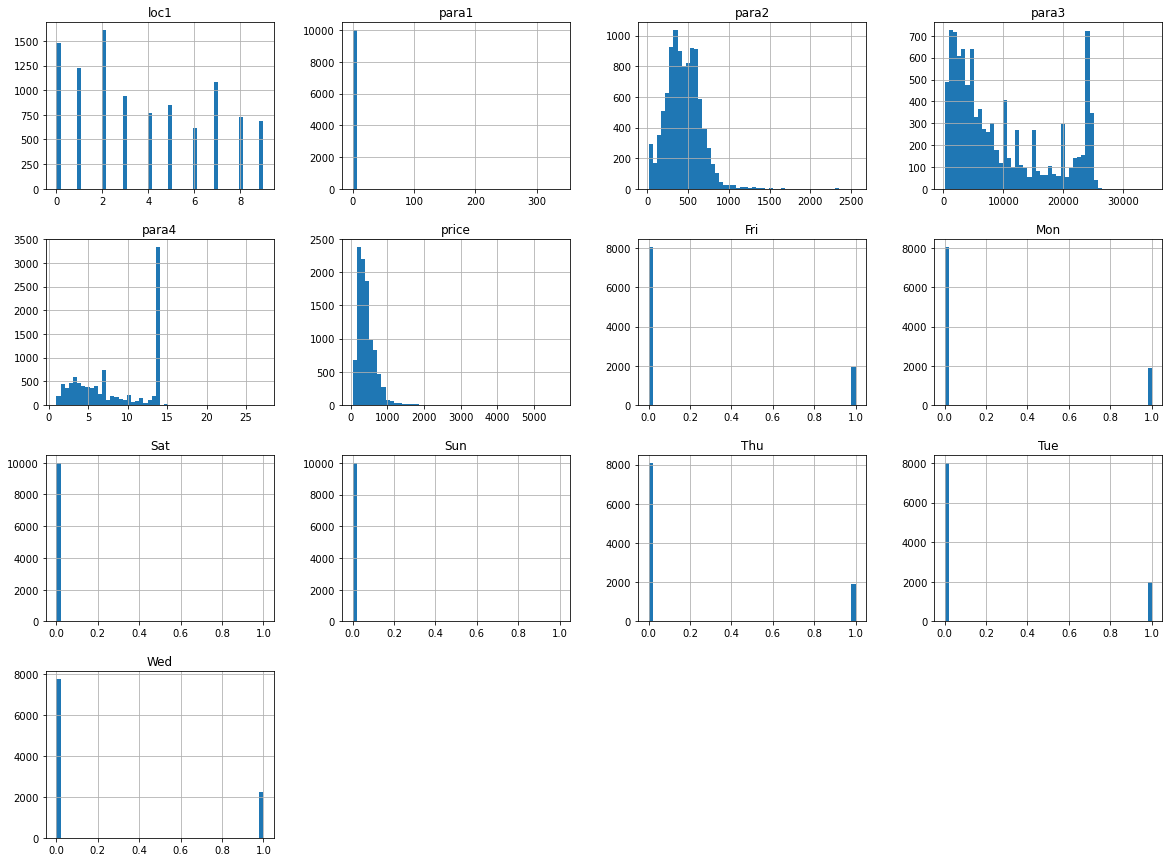

In [17]:
import matplotlib.pyplot as plt 

result.hist(bins=50, figsize=(20,15)) 


To see whether there is an anomaly or not, let's look at the statistics of our data frame.

In [18]:
result.describe()

,loc1,para1,para2,para3,para4,price,Fri,Mon,Sat,Sun,Thu,Tue,Wed
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.00000,9993.000000
mean,3.793355,1.379966,446.888522,9550.105894,8.460614,433.318379,0.192835,0.191734,0.001001,0.000300,0.190934,0.19984,0.223356
std,2.892286,3.501891,220.141080,8022.655794,4.613156,276.743453,0.394544,0.393685,0.031620,0.017325,0.393057,0.39990,0.416516
min,0.000000,0.000000,16.000000,200.000000,1.000000,50.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,301.000000,2900.000000,4.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,3.000000,1.000000,434.000000,6448.000000,7.200000,370.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,6.000000,1.000000,582.000000,15000.000000,13.600000,550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,9.000000,337.000000,2554.000000,34782.000000,27.200000,5700.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


It looks like we have an anomaly in the para1 column, especially in the max value - it is too far from the mean than it should be. 

In [19]:
result['para1'].value_counts()

1      7052
3      1609
0       836
2       265
4       164
5        51
6         6
7         3
13        2
9         2
24        1
8         1
337       1
Name: para1, dtype: int64

It looks like the main distribution of the para1 values is between 0 and 9, so I will select them.

In [20]:
result = result[result['para1'] < 10]

In [21]:
result.describe()

,loc1,para1,para2,para3,para4,price,Fri,Mon,Sat,Sun,Thu,Tue,Wed
count,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.00000,9989.000000
mean,3.793573,1.341776,446.926219,9550.045070,8.459277,433.247628,0.192612,0.191711,0.001001,0.000300,0.191010,0.19992,0.223446
std,2.892451,0.954364,220.174079,8022.209434,4.613233,276.704058,0.394371,0.393667,0.031626,0.017328,0.393117,0.39996,0.416575
min,0.000000,0.000000,16.000000,200.000000,1.000000,50.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,301.000000,2900.000000,4.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,3.000000,1.000000,434.000000,6448.000000,7.200000,370.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,7.000000,1.000000,582.000000,15000.000000,13.600000,550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,9.000000,9.000000,2554.000000,34782.000000,27.200000,5700.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


<AxesSubplot:>

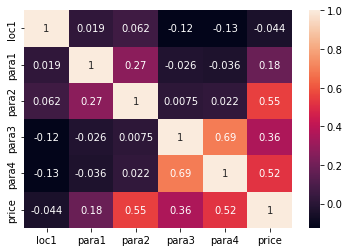

In [22]:
import seaborn as sns

sns.heatmap(result.iloc[:,0:6].corr(), annot = True)

As we can see, our data's best 3 correlated feature is: para2,para4,para3

In [23]:
three_best = []
df_= pd.DataFrame(result.corr()["price"]).sort_values(by = "price", ascending = False)
df_ = df_.drop(df_.index[0]).head(3)
for i in range(len(df_)):
    three_best.append(df_.index[i]) 

three_best

['para2', 'para4', 'para3']

## Question 2

2. Fit some ML model(s) and explain briefly your choices.

We will use and compare 5 different algorithms. 

These algorithms:

* Ridge Regression

* Decision Tree

* Random Forest

* XGBoost

* MLP

In [24]:
import sklearn
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor

In [25]:
y = result['price']
X = result.drop(columns = ['price'])

In [26]:
model_comparison = {}

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Ridge Regression

In [28]:
ridge_regression = linear_model.Ridge(random_state = 42)

In [29]:
ridge_regression.fit(X_train, y_train)

Ridge(random_state=42)

In [30]:
y_predict_ridge = ridge_regression.predict(X_train)
train_error_ridge = mean_squared_error(y_train, y_predict_ridge, squared = False)

y_predict_ridge = ridge_regression.predict(X_test)
test_error_ridge = mean_squared_error(y_test, y_predict_ridge, squared=False)

y_predict_ridge = ridge_regression.predict(X_train)
r2_ridge = r2_score(y_train, y_predict_ridge)

In [31]:
print('RIDGE REGRESSION')
print('Train Error      :', train_error_ridge) 
print('Test Error       :', test_error_ridge)
print('R2               :' , r2_ridge)

RIDGE REGRESSION
Train Error      : 184.5983205180397
Test Error       : 174.0215607338767
R2               : 0.5581137570721937


In [32]:
model_comparison['Ridge Regression'] = [train_error_ridge.round(3), test_error_ridge.round(3), r2_ridge.round(3)]

### Decision Tree

In [33]:
decision_tree = tree.DecisionTreeRegressor(random_state= 42, max_depth = 6)

In [34]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [35]:
y_predict_dt = decision_tree.predict(X_train)
train_error_dt = mean_squared_error(y_train, y_predict_dt, squared = False)

y_predict_dt = decision_tree.predict(X_test)
test_error_dt = mean_squared_error(y_test, y_predict_dt, squared=False)

y_predict_dt = decision_tree.predict(X_train)
r2_dt = r2_score(y_train, y_predict_dt)

In [36]:
print('DECISION TREE')
print('Train Error     :', train_error_dt) 
print('Test Error      :', test_error_dt)
print('R2              :' , r2_dt)

DECISION TREE
Train Error     : 143.4710632890469
Test Error      : 169.30069889199896
R2              : 0.7330784586795994


In [37]:
model_comparison['Decision Tree'] = [train_error_dt.round(3), test_error_dt.round(3), r2_dt.round(3)]

### Random Forest

In [38]:
random_forest = RandomForestRegressor(random_state = 42)

In [39]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
y_predict_rf = random_forest.predict(X_train)
train_error_rf = mean_squared_error(y_train, y_predict_rf, squared = False)

y_predict_rf = random_forest.predict(X_test)
test_error_rf = mean_squared_error(y_test, y_predict_rf, squared = False)

y_predict_rf = random_forest.predict(X_train)
r2_rf = r2_score(y_train, y_predict_rf)

In [41]:
print('RANDOM FOREST')
print('Train Error     :', train_error_rf) 
print('Test Error      :', test_error_rf)
print('R2              :' , r2_rf)

RANDOM FOREST
Train Error     : 57.75571879548165
Test Error      : 154.36893753359774
R2              : 0.9567441374542804


In [42]:
model_comparison['Random Forest'] = [train_error_rf.round(3), test_error_rf.round(3), r2_rf.round(3)]

### XGBOOST

In [43]:
xgboost = XGBRegressor(random_state = 42)

In [44]:
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [45]:
y_predict_xg = xgboost.predict(X_train)
train_error_xg = mean_squared_error(y_train, y_predict_xg, squared = False)

y_predict_xg = xgboost.predict(X_test)
test_error_xg = mean_squared_error(y_test, y_predict_xg, squared = False)

y_predict_xg = xgboost.predict(X_train)
r2_xg = r2_score(y_train, y_predict_xg)

In [46]:
print('XGBOOST')
print('Train Error     :', train_error_xg) 
print('Test Error      :', test_error_xg)
print('R2              :' , r2_xg)

XGBOOST
Train Error     : 83.69397074733641
Test Error      : 155.07966170157522
R2              : 0.909167067416725


In [47]:
model_comparison['Xgboost'] = [train_error_xg.round(3), test_error_xg.round(3), r2_xg.round(3)]

 ### MLP (Multi-Layer Perceptron) Regressor

In [48]:
mlp = MLPRegressor(random_state = 42)

In [49]:
mlp.fit(X_train, y_train)

MLPRegressor(random_state=42)

In [50]:
y_predict_mlp = mlp.predict(X_train)
train_error_mlp = mean_squared_error(y_train, y_predict_mlp, squared = False)

y_predict_mlp = mlp.predict(X_test)
test_error_mlp = mean_squared_error(y_test, y_predict_mlp, squared = False)

y_predict_mlp = mlp.predict(X_train)
r2_mlp = r2_score(y_train, y_predict_mlp)

In [51]:
model_comparison['MLP Regressor'] = [train_error_mlp.round(3), test_error_mlp.round(3), r2_mlp.round(3)]

In [52]:
model_comparison = pd.DataFrame(model_comparison).T
model_comparison

,0,1,2
Ridge Regression,184.598,174.022,0.558
Decision Tree,143.471,169.301,0.733
Random Forest,57.756,154.369,0.957
Xgboost,83.694,155.080,0.909
MLP Regressor,188.712,177.921,0.538


In [53]:
model_comparison.columns = ['Train Error', 'Test Error', 'R2 Score']
model_comparison

,Train Error,Test Error,R2 Score
Ridge Regression,184.598,174.022,0.558
Decision Tree,143.471,169.301,0.733
Random Forest,57.756,154.369,0.957
Xgboost,83.694,155.080,0.909
MLP Regressor,188.712,177.921,0.538


In [54]:
model_comparison['Model'] = ['Ridge Regression', 'Decision Tree', 'Random Forest', 'Xgboost', 'MLP Regressor']
model_comparison

,Train Error,Test Error,R2 Score,Model
Ridge Regression,184.598,174.022,0.558,Ridge Regression
Decision Tree,143.471,169.301,0.733,Decision Tree
Random Forest,57.756,154.369,0.957,Random Forest
Xgboost,83.694,155.080,0.909,Xgboost
MLP Regressor,188.712,177.921,0.538,MLP Regressor


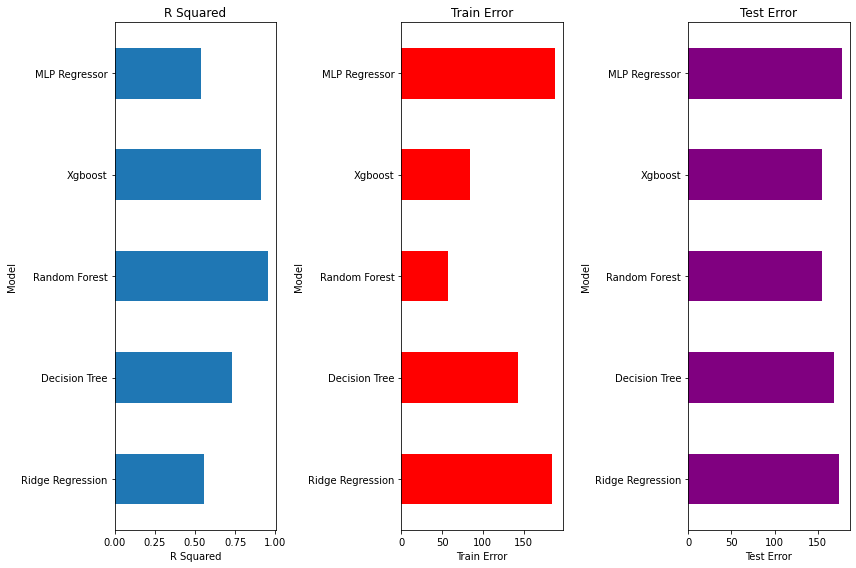

In [55]:
df_train_error = model_comparison[['Model', 'Train Error']]
df_test_error = model_comparison[['Model' , 'Test Error']]

# Create a figure and subplots 

fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize = (12,8))

# Create the first graph 

model_comparison.plot(kind = 'barh', x = 'Model', y = 'R2 Score', ax = ax2, legend = False)
ax2.set_xlabel('R Squared')
ax2.set_ylabel('Model')
ax2.set_title('R Squared')

# Create the second graph 

df_train_error.plot(kind = 'barh', x = 'Model', y = 'Train Error', color = 'red', ax = ax3, legend = False)
ax3.set_xlabel('Train Error')
ax3.set_ylabel('Model')
ax3.set_title('Train Error')

# Create the third graph 

df_test_error.plot(kind = 'barh', x = 'Model', y = 'Test Error', color = 'purple', ax = ax4, legend = False)
ax4.set_xlabel('Test Error')
ax4.set_ylabel('Model')
ax4.set_title('Test Error')

# Fit the figure

plt.tight_layout()


plt.show()

In [56]:
# Highest R Squared

model_comparison.sort_values(by = 'R2 Score', ascending = False)

,Train Error,Test Error,R2 Score,Model
Random Forest,57.756,154.369,0.957,Random Forest
Xgboost,83.694,155.080,0.909,Xgboost
Decision Tree,143.471,169.301,0.733,Decision Tree
Ridge Regression,184.598,174.022,0.558,Ridge Regression
MLP Regressor,188.712,177.921,0.538,MLP Regressor


In [57]:
# Minimum Test Error

model_comparison.sort_values(by = 'Test Error' , ascending = True)

,Train Error,Test Error,R2 Score,Model
Random Forest,57.756,154.369,0.957,Random Forest
Xgboost,83.694,155.080,0.909,Xgboost
Decision Tree,143.471,169.301,0.733,Decision Tree
Ridge Regression,184.598,174.022,0.558,Ridge Regression
MLP Regressor,188.712,177.921,0.538,MLP Regressor


In [58]:
# Minimum Train Error

model_comparison.sort_values(by = 'Train Error', ascending = True)

,Train Error,Test Error,R2 Score,Model
Random Forest,57.756,154.369,0.957,Random Forest
Xgboost,83.694,155.080,0.909,Xgboost
Decision Tree,143.471,169.301,0.733,Decision Tree
Ridge Regression,184.598,174.022,0.558,Ridge Regression
MLP Regressor,188.712,177.921,0.538,MLP Regressor


It seems as the Random Forest algorithm has the best performance. Let's implement a grid search to perform model tuning and find the best hyperparameters for the model. We'll start by training and evaluating the model with its default parameters.

## Question 3

3. Show with some X-validation the power of your model and comment the results.

### Grid Search in Random Forest

In [59]:
X = result.drop(columns = ['price'])
y = result['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = RandomForestRegressor(random_state = 42)

model_name = 'Random Forest'

model.fit(X_train, y_train)

y_predict = random_forest.predict(X_train)
train_error = mean_squared_error(y_train, y_predict, squared = False)

y_predict = random_forest.predict(X_test)
test_error = mean_squared_error(y_test, y_predict, squared = False)

y_predict = random_forest.predict(X_train)
r2 = r2_score(y_train, y_predict)

print('RANDOM FOREST')
print('Train Error     :', train_error.round(3)) 
print('Test Error      :', test_error.round(3))
print('R2              :' , r2.round(3))

RANDOM FOREST
Train Error     : 57.756
Test Error      : 154.369
R2              : 0.957


In [60]:
# Look at the default parameters of this fitted Random Forest model.

model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [61]:
# Look at what are the available metrics we could use for our grid search.

sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [62]:
# Select mean squared error as a scoring metric. 
# We will only add a few options because once the number of parameter options increases, 
# the time of the grid search model will increase.

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search

param_grid = {
    'bootstrap': [True],
    'ccp_alpha' : [0.0],
    'criterion': ['squared_error'],
    'max_depth': [None],    
    'max_features': ['auto'],
    'max_leaf_nodes' : [None],
    'max_samples' : [None],
    'min_impurity_decrease' : [0.0],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'min_weight_fraction_leaf' : [0.0],
    'n_estimators': [50, 500, 700,],
    'n_jobs' : [None],
    'oob_score' :[True, False],
    'random_state' : [42],
    'verbose' : [0],
    'warm_start' : [True, False],
}

# Create a based model

random_forest = RandomForestRegressor()

# Instantiate the grid search model

grid_search = GridSearchCV(estimator = random_forest, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 0,
                          scoring = 'neg_mean_squared_error')

In [ ]:
# Now, we will add a timer before and end of this code to measure the time spent.

import time

start = time.time()
grid_search.fit(X_train, y_train)

end = time.time()

elapsed_time_seconds = end - start

elapsed_time = (elapsed_time_seconds) / 60

elapsed_time_seconds = round(elapsed_time_seconds,2)

elapsed_time = round(elapsed_time,2)

print('Execution Time : ', elapsed_time_seconds, ' seconds which is : ', elapsed_time, ' minutes.')

We calculate 36 fits and the result will be printed in 100.41 seconds.

Here, we will store the set of the best parameters as best_params.

In [ ]:
best_params = grid_search.best_params_
best_params

In [ ]:
X = result.drop(columns = ['price'])
y = result['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = RandomForestRegressor()

model.set_params(**best_params)

model_name = 'Random Forest'

model.fit(X_train, y_train)

y_predict_grid = model.predict(X_train)
train_error_grid = mean_squared_error(y_train, y_predict_grid, squared = False)

y_predict_grid = model.predict(X_test)
test_error_grid = mean_squared_error(y_test, y_predict_grid, squared = False)

y_predict_grid = model.predict(X_train)
r2_grid = r2_score(y_train, y_predict_grid)

print('RANDOM FOREST')
print('Train Error     :', train_error_grid.round(3)) 
print('Test Error      :', test_error_grid.round(3))
print('R2              :' , r2_grid.round(3))

Scaling is used to increase the model's performance. We will compare 3 different scalings: min-max, standard scaler, and robust scaler.

### Min-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = result.drop(columns = ['price'])
y = result['price']

# asanyarray() function is used when we want to convert the input to an array but it passes ndarray subclasses through.

y = np.asanyarray(y).reshape(-1, 1)

In [ ]:
X_scaler = MinMaxScaler()
X_scaler.fit(X = X, y = y)
X_scaled = X_scaler.transform(X)

y_scaler = MinMaxScaler()
y_scaler.fit(y)
y_scaled = y_scaler.transform(y)

In [ ]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size = 0.20, 
                                                                               random_state = 42)

inverse_transform() = Scaler remembers that you passed it a 2D input with two columns, and works under the assumption that all subsequent data passed to it will have the same number of features/columns.

In [ ]:
model = RandomForestRegressor()
model.set_params(**best_params)
model.fit(X_train_scaled, y_train_scaled)

y_predict_scaled = model.predict(X_train_scaled)

y_predict_train_min_max = y_scaler.inverse_transform(y_predict_scaled.reshape(-1,1))

rmse_error_train_min_max = mean_squared_error(y_train, y_predict_train_min_max[:,0], squared = False)

r2_min_max = r2_score(y_train, y_predict_train_min_max)

In [ ]:
model = RandomForestRegressor()
model.set_params(**best_params)
model.fit(X_test_scaled, y_test_scaled)

y_predict_scaled_test = model.predict(X_test_scaled)

y_predict_test_min_max = y_scaler.inverse_transform(y_predict_scaled_test.reshape(-1,1))

rmse_error_test_min_max = mean_squared_error(y_test, y_predict_test_min_max[:,0], squared = False)

In [ ]:
print('Normalized Train Error = ''{}'.format(rmse_error_train_min_max))
print("Normalized Test error = "'{}'.format(rmse_error_test_min_max))
print("Normalized r2_score = "'{}'.format(r2_min_max))

### Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_scaler.fit(X = X, y = y)
X_scaled = X_scaler.transform(X)

y_scaler = StandardScaler()
y_scaler.fit(y)
y_scaled = y_scaler.transform(y)

In [ ]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size = 0.2, 
                                                                               random_state = 42) 

In [ ]:
model = RandomForestRegressor()
model.set_params(**best_params)
model.fit(X_train_scaled, y_train_scaled)

y_predict_scaled = model.predict(X_train_scaled)

y_predict_train_standard = y_scaler.inverse_transform(y_predict_scaled.reshape(-1, 1))

rmse_error_train_standard = mean_squared_error(y_train, y_predict_train_standard[:,0], squared = False)

r2_standard = r2_score(y_train, y_predict_train_standard)

In [ ]:
model = RandomForestRegressor()
model.set_params(**best_params)
model.fit(X_test_scaled, y_test_scaled)

y_predict_scaled_test = model.predict(X_test_scaled)

y_predict_test_standard = y_scaler.inverse_transform(y_predict_scaled_test.reshape(-1,1))

rmse_error_test_standard = mean_squared_error(y_test, y_predict_test_standard[:,0],squared = False)

In [ ]:
print("Normalized Train error = "'{}'.format(rmse_error_train_standard))
print("Normalized Test error = "'{}'.format(rmse_error_test_standard))
print("Normalized r2_score = "'{}'.format(r2_standard))

### Robust Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

X_scaler = RobustScaler()
X_scaler.fit(X = X, y = y)
X_scaled = X_scaler.transform(X)

y_scaler = RobustScaler()
y_scaler.fit(y)
y_scaled = y_scaler.transform(y)

In [ ]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size = 0.2, 
                                                                               random_state = 42) 

In [ ]:
model = RandomForestRegressor()
model.set_params(**best_params)
model.fit(X_train_scaled, y_train_scaled)

y_predict_scaled = model.predict(X_train_scaled)

y_predict_train_robust = y_scaler.inverse_transform(y_predict_scaled.reshape(-1,1))

rmse_error_train_robust = mean_squared_error(y_train, y_predict_train_robust[:,0], squared = False)

r2_robust = r2_score(y_train, y_predict_train_robust)

In [ ]:
model = RandomForestRegressor()
model.set_params(**best_params)
model.fit(X_test_scaled, y_test_scaled)

y_predict_scaled_test = model.predict(X_test_scaled)

y_predict_test_robust = y_scaler.inverse_transform(y_predict_scaled_test.reshape(-1,1))

rmse_error_test_robust = mean_squared_error(y_test, y_predict_test_robust[:,0], squared = False)

In [ ]:
print("Normalized Train error = "'{}'.format(rmse_error_train_robust))
print("Normalized Test error = "'{}'.format(rmse_error_test_robust))
print("Normalized Train r2_score = "'{}'.format(r2_robust))

In [ ]:
pred_dict = {
    "Technique": ["Base Model", "Grid Search", "Min-Max Scaling", "Standard-Scaling", "Robust-Scaling"], #min-max scaling, #standard scaling, #robust # grid search
    "Train Error": [train_error, train_error_grid, rmse_error_train_min_max, rmse_error_train_standard, rmse_error_train_robust],
    "Test Error": [test_error, test_error_grid, rmse_error_test_min_max, rmse_error_test_standard, rmse_error_test_robust],
    "R2" : [r2, r2_grid, r2_min_max, r2_standard, r2_robust]
}

In [ ]:
pred_data = pd.DataFrame(pred_dict)
pred_data

In [ ]:
# Create a figure and subplots

fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize = (12,8))

# Create the first graph

pred_data.plot(kind = 'bar', x = 'Technique', y = 'R2', ax = ax2, legend = False)
ax2.set_xlabel('R Squared')
ax2.set_title('R Squared')
ax2.tick_params(axis = 'x', labelrotation = 45)


# Create the second graph

pred_data.plot(kind='bar', x='Technique', y='Train Error', color='red', ax=ax3, legend=False)
ax3.set_xlabel('Train Error')
ax3.set_title('Train Error')
ax3.tick_params(axis='x', labelrotation=45)


# Create the second graph

pred_data.plot(kind='bar', x='Technique', y='Test Error', color='green', ax=ax4, legend=False)
ax4.set_xlabel('Test Error')
ax4.set_title('Test Error')
ax4.tick_params(axis='x', labelrotation=45)

# Fit the figure
plt.tight_layout()

# Show the figure
plt.show()

## Question 4

4. Present us the results and the steps you have taken and also with some critical thinking and next steps.

Since we already tried different classical regression models, let's try a deep learning model to find out whether there will be any significant changes to performance or not.

In [64]:
y = result['price']
X = result.drop(columns = 'price')

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 42)

This code is creating a neural network model using the Sequential API from TensorFlow's tf.keras module.

It has two dense layers, with the first one using the ReLU activation function.

The model is then compiled with the Adam optimizer and a learning rate of 0.0001, as well as the Mean Squared Error loss function and the Mean Absolute Error (MAE) metric.

The model is then fit to the training data for 100 epochs, with a batch size of 32 and validation data being the test data. The MAE and val_MAE are then plotted over the epochs, with the final MAE and val_MAE added as text labels at the end of the lines.

In [66]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
import time

2023-03-10 10:50:46.433668: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [71]:
start = time.time()

tf.random.set_seed(42)

# Define a new model with more layers

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 64, activation = 'relu', input_shape = [X_train.shape[1]]),
    tf.keras.layers.Dense(units = 1)
])

# Compile the model with a lower learning rate

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
             loss = tf.losses.MeanSquaredError(),
             metrics = [tf.keras.metrics.MeanAbsoluteError()])

# Fit the model to the training data

history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, verbose = 1,
                   validation_data = (X_test, y_test))

y_train_pred = model.predict(X_train)

r2_first = r2_score(y_train, y_train_pred)

# Select the MAE and val_MAE for the four desired epoch

epoch_to_plot = [5, 10, 15, 20, 25, 30]

mae_first = [history.history['mean_absolute_error'][epoch - 1] for epoch in epoch_to_plot]

val_mae_first = [history.history['val_mean_absolute_error'][epoch -1] for epoch in epoch_to_plot] 

Epoch 1/30
250/250 [==============================] - 1s 2ms/step - loss: 14786288.0000 - mean_absolute_error: 2980.0442 - val_loss: 5406878.0000 - val_mean_absolute_error: 1876.8650
Epoch 2/30
250/250 [==============================] - 0s 1ms/step - loss: 2065067.0000 - mean_absolute_error: 1107.4813 - val_loss: 433889.0938 - val_mean_absolute_error: 550.1557
Epoch 3/30
250/250 [==============================] - 0s 1ms/step - loss: 164782.2812 - mean_absolute_error: 296.1519 - val_loss: 63444.1484 - val_mean_absolute_error: 168.9222
Epoch 4/30
250/250 [==============================] - 0s 1ms/step - loss: 66842.5547 - mean_absolute_error: 169.1419 - val_loss: 57681.1875 - val_mean_absolute_error: 162.6282
Epoch 5/30
250/250 [==============================] - 0s 1ms/step - loss: 64150.4961 - mean_absolute_error: 165.5209 - val_loss: 55207.5234 - val_mean_absolute_error: 158.5852
Epoch 6/30
250/250 [==============================] - 0s 1ms/step - loss: 61075.4141 - mean_absolute_error: 

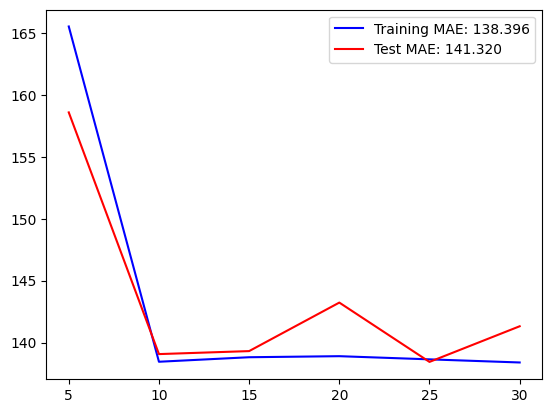

Execution time: 159.73 seconds which is: 2.66 minutes.


In [72]:
# Plot the MAE 

plt.plot(epoch_to_plot, mae_first, 'b', label = f'Training MAE: {mae_first[-1]:.3f}')

# Plot the val_MAE

plt.plot(epochs_to_plot, val_mae_first, 'r', label=f'Test MAE: {val_mae_first[-1]:.3f}')
plt.legend()
plt.show()

end = time.time()

elapsed_time_seconds = end - start

elapsed_time = (elapsed_time_seconds) / 60

elapsed_time_seconds = round(elapsed_time_seconds,2)

elapsed_time = round(elapsed_time,2)

print('Execution time:', elapsed_time_seconds, 'seconds which is:', elapsed_time, 'minutes.' )


Now at this stage, we will add more layers, to see the output.

Also, we will increase the learning rate and the epochs, but this time we will select a verbose argument as zero to prevent the outcome to be printed to the console.

Also, we will apply regularization

In [73]:
from tensorflow.keras import regularizers

In [77]:
start = time.time()

tf.random.set_seed(42)

# Define a new model with more layers

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 64, activation = 'relu', input_shape = [X_train.shape[1]],
                         kernel_regularizer = regularizers.l2(0.01)),
    tf.keras.layers.Dense(units = 32, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    tf.keras.layers.Dense(units = 16, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    tf.keras.layers.Dense(units = 8, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    tf.keras.layers.Dense(units = 1, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))   
])

# Compile the model with a lower learning rate

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0007),
             loss = tf.losses.MeanSquaredError(),
             metrics = [tf.metrics.MeanAbsoluteError()])

# Fit the model to the training data

history = model.fit(X_train, y_train, epochs = 1000, batch_size = 32, verbose = 0, 
                   validation_data = (X_test, y_test))

y_train_pred = model.predict(X_train)

r2_second = r2_score(y_train, y_train_pred)

# Select the MAE and val_MAe for the four desired epochs

epoch_to_plot = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

mae_second = [history.history['mean_absolute_error'][epoch - 1] for epoch in epoch_to_plot]

val_mae_second = [history.history['val_mean_absolute_error'][epoch - 1] for epoch in epoch_to_plot]

250/250 [==============================] - 0s 627us/step


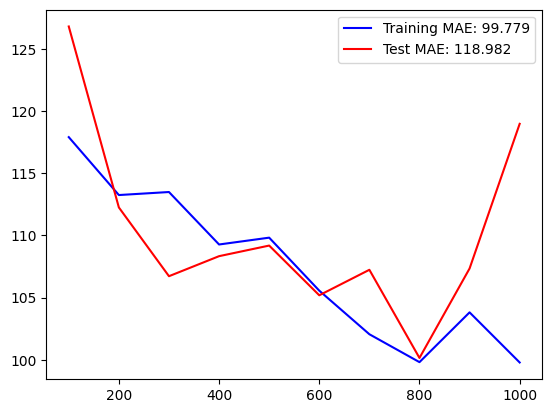

Execution time :  414.54  seconds which is :  6.91  minutes.


In [81]:
# Plot the MAE

plt.plot(epoch_to_plot, mae_second, 'b', label = f'Training MAE: {mae_second[-1]:.3f}')

# Plot the val_MAE

plt.plot(epoch_to_plot, val_mae_second, 'r', label=f'Test MAE: {val_mae_second[-1]:.3f}')

plt.legend()

plt.show()

end = time.time()

elapsed_time_seconds = end - start

elapsed_time = (elapsed_time_seconds) / 60

elapsed_time_seconds = round(elapsed_time_seconds, 2)

elapsed_time = round(elapsed_time, 2)

print('Execution time : ', elapsed_time_seconds, ' seconds which is : ', elapsed_time, ' minutes.')

In [82]:
pred_dict = {
    "Algorithm": ["DL", "DL optimized"], #min-max scaling, #standard scaling, #robust # grid search
    "Train Error": [mae_first[-1] , mae_second[-1]],
    "Test Error": [val_mae_first[-1] , val_mae_second[-1]],
    "R2" : [r2_first, r2_second] }

In [83]:
pred_data = pd.DataFrame(pred_dict)
pred_data

,Algorithm,Train Error,Test Error,R2
0,DL,138.396042,141.319809,0.434719
1,DL optimized,99.778816,118.982414,0.587034


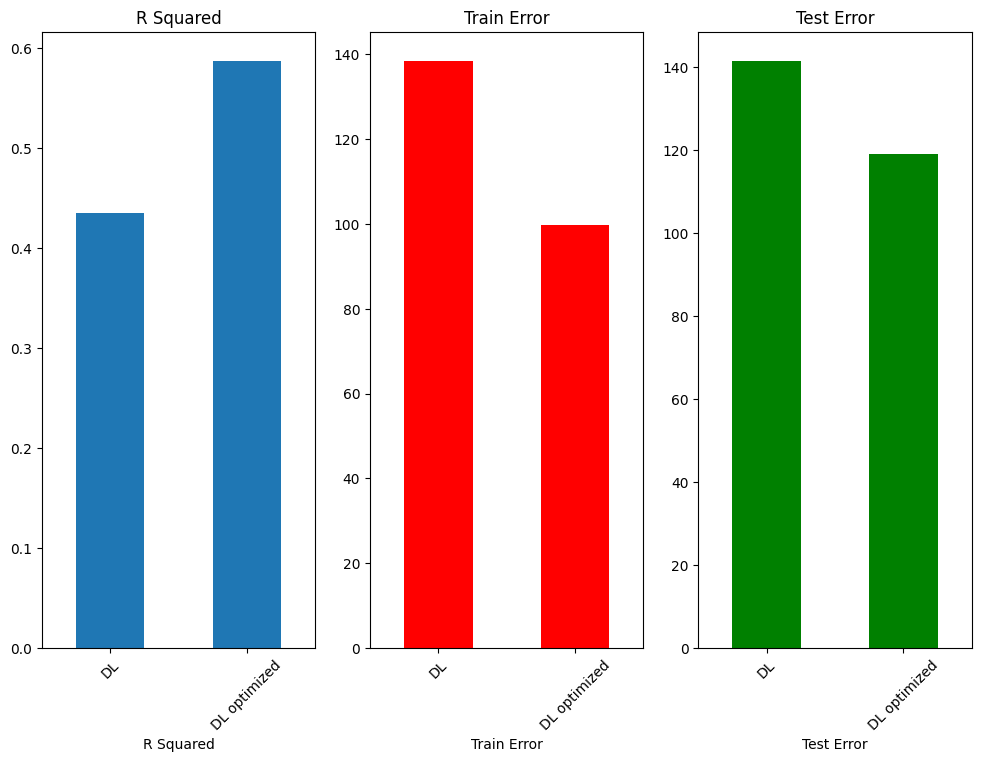

In [86]:
# Create a figure and subsplots

fid, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize = (12, 8))

# Create the first graph

pred_data.plot(kind = 'bar' , x = 'Algorithm', y = 'R2', ax = ax2,
              legend = False)
ax2.set_xlabel('R Squared')
ax2.set_title('R Squared')
ax2.tick_params(axis='x', labelrotation=45)

# Create the second graph

pred_data.plot(kind='bar', x='Algorithm', y='Train Error', color='red', ax=ax3, legend=False)
ax3.set_xlabel('Train Error')
ax3.set_title('Train Error')
ax3.tick_params(axis='x', labelrotation=45)


# Create the second graph

pred_data.plot(kind='bar', x='Algorithm', y='Test Error', color='green', ax=ax4, legend=False)
ax4.set_xlabel('Test Error')
ax4.set_title('Test Error')
ax4.tick_params(axis='x', labelrotation=45)

Using the Random Forest regressors, we obtained the following performance:

With Standard Scaler - Test error = 59.044691

On the other hand, in deep learning, we get great results too.

Deep Learning - Test Error: 102.94

It looks like we have the best performance model with Grid Search after normalization with Random Forest Regression.